### initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = '/content/drive/My Drive/'

In [ ]:
import pandas as pd

batch_df=pd.read_csv(project_path+'batch_size_result.csv')
batch_df['TPU']=""
batch_df['TAcc']=""
batch_df['TLoss']=""
print(batch_df)

unit_df=pd.read_csv(project_path+'units_result.csv')
unit_df['TPU']=""
unit_df['TAcc']=""
unit_df['TLoss']=""
print(unit_df)

layer_df=pd.read_csv(project_path+'layer_result.csv')
layer_df['TPU']=""
layer_df['TAcc']=""
layer_df['TLoss']=""
layer_df

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  batch size    GPU  GAcc  GLoss  \
0           0             0               0        1024  22.48  0.98   0.07   
1           1             1               1         512  42.03  0.98   0.07   
2           2             2               2         256  41.39  0.98   0.08   

       CPU   CAcc  CLoss TPU TAcc TLoss  
0  1462.63  0.979  0.075                 
1  1462.46  0.983  0.070                 
2  1522.45  0.981  0.075                 
   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Units    GPU   GAcc  GLoss  \
0           0             0               0      8   3.96  0.962  0.465   
1           1             1               1     16  10.96  0.967  0.312   
2           2             2               2     32  10.65  0.974  0.145   
3           3             3               3     64  10.39  0.975  0.155   
4           4             4               4    128  20.88  0.977  0.106   
5           5             5               5    256  34.38  0.982 

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Layers,GPU,GAcc,GLoss,CPU,CAcc,CLoss,TPU,TAcc,TLoss
0,0,0,0,2,22.48,0.981,0.065,1462.63,0.979,0.075,,,
1,1,1,1,3,82.38,0.984,0.052,4882.52,0.984,0.057,,,
2,2,2,2,4,125.59,0.987,0.041,-29.68,0.986,0.051,,,


###Model

In [ ]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.9.2'

In [ ]:
# Check if eager execution mode is on
tf.executing_eagerly()

True

In [ ]:
from tensorflow.keras.datasets import mnist
#Load the data and split it into train and test 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#Get the image shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
split = 0.2
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(X_train.shape, y_train.shape, X_val.shape, y_val.shape))

x_train: (48000, 28, 28), y_train: (48000,), x_val: (12000, 28, 28), y_val: (12000,)


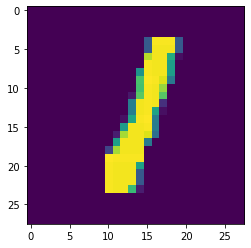

In [ ]:
#importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
# Reshaping the data to fit the model
X_train = X_train.reshape(48000, 28, 28, 1)
X_val = X_val.reshape(12000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_val_one_hot= to_categorical(y_val)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# Distribution strategies
import os
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# batch size

###batch_size=1024

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers
  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1000, epochs=10)

end = time()

Epoch 1/10
48/48 [==============================] - 5s 48ms/step - loss: 2.9652 - accuracy: 0.7275 - val_loss: 0.2228 - val_accuracy: 0.9294
Epoch 2/10
48/48 [==============================] - 2s 35ms/step - loss: 0.1532 - accuracy: 0.9539 - val_loss: 0.1207 - val_accuracy: 0.9622
Epoch 3/10
48/48 [==============================] - 1s 31ms/step - loss: 0.0929 - accuracy: 0.9719 - val_loss: 0.0933 - val_accuracy: 0.9717
Epoch 4/10
48/48 [==============================] - 1s 30ms/step - loss: 0.0680 - accuracy: 0.9794 - val_loss: 0.0828 - val_accuracy: 0.9753
Epoch 5/10
48/48 [==============================] - 2s 32ms/step - loss: 0.0535 - accuracy: 0.9831 - val_loss: 0.0727 - val_accuracy: 0.9791
Epoch 6/10
48/48 [==============================] - 1s 30ms/step - loss: 0.0443 - accuracy: 0.9864 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 7/10
48/48 [==============================] - 2s 32ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 8/10
48

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 20.577211141586304 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

batch_df['TPU'][batch_df['batch size']==1024]=round(end-start, 2)
batch_df['TAcc'][batch_df['batch size']==1024]=round(test_acc, 3)
batch_df['TLoss'][batch_df['batch size']==1024]=round(test_loss, 3)

layer_df['TPU'][layer_df['Layers']==2]=round(end-start, 2)
layer_df['TAcc'][layer_df['Layers']==2]=round(test_acc, 3)
layer_df['TLoss'][layer_df['Layers']==2]=round(test_loss, 3)

313/313 [==============================] - 9s 22ms/step - loss: 0.0767 - accuracy: 0.9798


<ipython-input-44-d1ba1379df74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TPU'][batch_df['batch size']==1024]=round(end-start, 2)
<ipython-input-44-d1ba1379df74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TAcc'][batch_df['batch size']==1024]=round(test_acc, 3)
<ipython-input-44-d1ba1379df74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TLoss'][batch_df['batch size']==1024]=round(test_loss,

###batch_size=512

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers
  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=512, epochs=10)

end = time()

Epoch 1/10
94/94 [==============================] - 12s 81ms/step - loss: 1.3847 - accuracy: 0.8370 - val_loss: 0.1480 - val_accuracy: 0.9556
Epoch 2/10
94/94 [==============================] - 3s 33ms/step - loss: 0.1099 - accuracy: 0.9668 - val_loss: 0.0944 - val_accuracy: 0.9714
Epoch 3/10
94/94 [==============================] - 3s 30ms/step - loss: 0.0695 - accuracy: 0.9792 - val_loss: 0.0788 - val_accuracy: 0.9761
Epoch 4/10
94/94 [==============================] - 3s 30ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0813 - val_accuracy: 0.9753
Epoch 5/10
94/94 [==============================] - 3s 31ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0671 - val_accuracy: 0.9799
Epoch 6/10
94/94 [==============================] - 3s 30ms/step - loss: 0.0320 - accuracy: 0.9901 - val_loss: 0.0628 - val_accuracy: 0.9803
Epoch 7/10
94/94 [==============================] - 3s 29ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.0695 - val_accuracy: 0.9803
Epoch 8/10
9

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 39.63025403022766 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

batch_df['TPU'][batch_df['batch size']==512]=round(end-start, 2)
batch_df['TAcc'][batch_df['batch size']==512]=round(test_acc, 3)
batch_df['TLoss'][batch_df['batch size']==512]=round(test_loss, 3)


313/313 [==============================] - 8s 21ms/step - loss: 0.0607 - accuracy: 0.9839


<ipython-input-48-3c661c3d7640>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TPU'][batch_df['batch size']==512]=round(end-start, 2)
<ipython-input-48-3c661c3d7640>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TAcc'][batch_df['batch size']==512]=round(test_acc, 3)
<ipython-input-48-3c661c3d7640>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TLoss'][batch_df['batch size']==512]=round(test_loss, 3)

###batch_size=256

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers
  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=256, epochs=10)

end = time()

Epoch 1/10
188/188 [==============================] - 16s 50ms/step - loss: 1.0281 - accuracy: 0.8868 - val_loss: 0.1024 - val_accuracy: 0.9675
Epoch 2/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0826 - val_accuracy: 0.9753
Epoch 3/10
188/188 [==============================] - 5s 28ms/step - loss: 0.0561 - accuracy: 0.9827 - val_loss: 0.0790 - val_accuracy: 0.9759
Epoch 4/10
188/188 [==============================] - 5s 26ms/step - loss: 0.0434 - accuracy: 0.9862 - val_loss: 0.0724 - val_accuracy: 0.9797
Epoch 5/10
188/188 [==============================] - 5s 27ms/step - loss: 0.0325 - accuracy: 0.9899 - val_loss: 0.0808 - val_accuracy: 0.9783
Epoch 6/10
188/188 [==============================] - 5s 29ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 0.0718 - val_accuracy: 0.9802
Epoch 7/10
188/188 [==============================] - 5s 28ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0764 - val_accuracy: 0.981

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 63.9859676361084 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)
batch_df['TPU'][batch_df['batch size']==256]=round(end-start, 2)
batch_df['TAcc'][batch_df['batch size']==256]=round(test_acc, 3)
batch_df['TLoss'][batch_df['batch size']==256]=round(test_loss, 3)
batch_df


313/313 [==============================] - 8s 22ms/step - loss: 0.0873 - accuracy: 0.9800


<ipython-input-52-0763b194e8e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TPU'][batch_df['batch size']==256]=round(end-start, 2)
<ipython-input-52-0763b194e8e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TAcc'][batch_df['batch size']==256]=round(test_acc, 3)
<ipython-input-52-0763b194e8e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch_df['TLoss'][batch_df['batch size']==256]=round(test_loss, 3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,batch size,GPU,GAcc,GLoss,CPU,CAcc,CLoss,TPU,TAcc,TLoss
0,0,0,0,1024,22.48,0.98,0.07,1462.63,0.979,0.075,20.58,0.98,0.077
1,1,1,1,512,42.03,0.98,0.07,1462.46,0.983,0.070,39.63,0.984,0.061
2,2,2,2,256,41.39,0.98,0.08,1522.45,0.981,0.075,63.99,0.98,0.087


# Units for batch size =1024



## Unit=8

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():# Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(8, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  #model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 9s 104ms/step - loss: 13.1697 - accuracy: 0.6146 - val_loss: 3.0398 - val_accuracy: 0.8330
Epoch 2/10
47/47 [==============================] - 2s 38ms/step - loss: 2.2383 - accuracy: 0.8654 - val_loss: 1.8140 - val_accuracy: 0.8805
Epoch 3/10
47/47 [==============================] - 2s 39ms/step - loss: 1.3587 - accuracy: 0.9009 - val_loss: 1.2227 - val_accuracy: 0.9070
Epoch 4/10
47/47 [==============================] - 2s 37ms/step - loss: 0.9508 - accuracy: 0.9186 - val_loss: 0.9457 - val_accuracy: 0.9233
Epoch 5/10
47/47 [==============================] - 2s 34ms/step - loss: 0.7273 - accuracy: 0.9318 - val_loss: 0.7916 - val_accuracy: 0.9297
Epoch 6/10
47/47 [==============================] - 2s 35ms/step - loss: 0.5844 - accuracy: 0.9395 - val_loss: 0.6992 - val_accuracy: 0.9361
Epoch 7/10
47/47 [==============================] - 2s 35ms/step - loss: 0.4922 - accuracy: 0.9456 - val_loss: 0.6316 - val_accuracy: 0.9400
Epoch 8/10


In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 25.671193838119507 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==8]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==8]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==8]=round(test_loss, 3)

313/313 [==============================] - 8s 21ms/step - loss: 0.4727 - accuracy: 0.9481


<ipython-input-56-58a37183cd39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==8]=round(end-start, 2)
<ipython-input-56-58a37183cd39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==8]=round(test_acc, 3)
<ipython-input-56-58a37183cd39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==8]=round(test_loss, 3)


## Unit=16

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
# Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(16, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 8s 96ms/step - loss: 8.9737 - accuracy: 0.7282 - val_loss: 2.3894 - val_accuracy: 0.8826
Epoch 2/10
47/47 [==============================] - 2s 38ms/step - loss: 1.7953 - accuracy: 0.8957 - val_loss: 1.3823 - val_accuracy: 0.9073
Epoch 3/10
47/47 [==============================] - 2s 39ms/step - loss: 1.0492 - accuracy: 0.9179 - val_loss: 0.9205 - val_accuracy: 0.9272
Epoch 4/10
47/47 [==============================] - 2s 34ms/step - loss: 0.6892 - accuracy: 0.9361 - val_loss: 0.7093 - val_accuracy: 0.9367
Epoch 5/10
47/47 [==============================] - 2s 40ms/step - loss: 0.5050 - accuracy: 0.9474 - val_loss: 0.6102 - val_accuracy: 0.9415
Epoch 6/10
47/47 [==============================] - 2s 39ms/step - loss: 0.4054 - accuracy: 0.9541 - val_loss: 0.5207 - val_accuracy: 0.9483
Epoch 7/10
47/47 [==============================] - 2s 39ms/step - loss: 0.3432 - accuracy: 0.9578 - val_loss: 0.4741 - val_accuracy: 0.9498
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 26.01322078704834 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==16]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==16]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==16]=round(test_loss, 3)

313/313 [==============================] - 8s 23ms/step - loss: 0.3547 - accuracy: 0.9584


<ipython-input-60-941938cbfbf8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==16]=round(end-start, 2)
<ipython-input-60-941938cbfbf8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==16]=round(test_acc, 3)
<ipython-input-60-941938cbfbf8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==16]=round(test_loss, 3)


## Unit=32

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(32, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 8s 84ms/step - loss: 6.5897 - accuracy: 0.7640 - val_loss: 1.3743 - val_accuracy: 0.9065
Epoch 2/10
47/47 [==============================] - 2s 35ms/step - loss: 0.8781 - accuracy: 0.9275 - val_loss: 0.6265 - val_accuracy: 0.9385
Epoch 3/10
47/47 [==============================] - 2s 38ms/step - loss: 0.4225 - accuracy: 0.9502 - val_loss: 0.4052 - val_accuracy: 0.9490
Epoch 4/10
47/47 [==============================] - 2s 36ms/step - loss: 0.2516 - accuracy: 0.9630 - val_loss: 0.3119 - val_accuracy: 0.9572
Epoch 5/10
47/47 [==============================] - 2s 39ms/step - loss: 0.1791 - accuracy: 0.9685 - val_loss: 0.2704 - val_accuracy: 0.9615
Epoch 6/10
47/47 [==============================] - 2s 41ms/step - loss: 0.1288 - accuracy: 0.9751 - val_loss: 0.2488 - val_accuracy: 0.9613
Epoch 7/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0974 - accuracy: 0.9792 - val_loss: 0.2216 - val_accuracy: 0.9647
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 25.70589017868042 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==32]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==32]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==32]=round(test_loss, 3)

313/313 [==============================] - 8s 21ms/step - loss: 0.2021 - accuracy: 0.9692


<ipython-input-64-b60e128e49e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==32]=round(end-start, 2)
<ipython-input-64-b60e128e49e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==32]=round(test_acc, 3)
<ipython-input-64-b60e128e49e4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==32]=round(test_loss, 3)


## Unit=64

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  #model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 7s 89ms/step - loss: 6.4186 - accuracy: 0.7788 - val_loss: 1.0843 - val_accuracy: 0.9268
Epoch 2/10
47/47 [==============================] - 2s 36ms/step - loss: 0.6417 - accuracy: 0.9436 - val_loss: 0.3791 - val_accuracy: 0.9597
Epoch 3/10
47/47 [==============================] - 2s 39ms/step - loss: 0.2516 - accuracy: 0.9665 - val_loss: 0.2486 - val_accuracy: 0.9681
Epoch 4/10
47/47 [==============================] - 2s 40ms/step - loss: 0.1478 - accuracy: 0.9745 - val_loss: 0.2087 - val_accuracy: 0.9698
Epoch 5/10
47/47 [==============================] - 2s 48ms/step - loss: 0.0991 - accuracy: 0.9797 - val_loss: 0.1905 - val_accuracy: 0.9690
Epoch 6/10
47/47 [==============================] - 2s 37ms/step - loss: 0.0711 - accuracy: 0.9843 - val_loss: 0.1677 - val_accuracy: 0.9722
Epoch 7/10
47/47 [==============================] - 2s 41ms/step - loss: 0.0486 - accuracy: 0.9873 - val_loss: 0.1671 - val_accuracy: 0.9713
Epoch 8/10
47

In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 25.43334412574768 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==64]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==64]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==64]=round(test_loss, 3)

313/313 [==============================] - 8s 22ms/step - loss: 0.1351 - accuracy: 0.9750


<ipython-input-68-8de172588881>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==64]=round(end-start, 2)
<ipython-input-68-8de172588881>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==64]=round(test_acc, 3)
<ipython-input-68-8de172588881>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==64]=round(test_loss, 3)


## Unit=128

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  #model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 9s 100ms/step - loss: 16.1539 - accuracy: 0.7195 - val_loss: 1.5001 - val_accuracy: 0.9086
Epoch 2/10
47/47 [==============================] - 2s 41ms/step - loss: 0.7869 - accuracy: 0.9368 - val_loss: 0.3860 - val_accuracy: 0.9545
Epoch 3/10
47/47 [==============================] - 2s 36ms/step - loss: 0.2318 - accuracy: 0.9672 - val_loss: 0.2089 - val_accuracy: 0.9684
Epoch 4/10
47/47 [==============================] - 2s 37ms/step - loss: 0.1144 - accuracy: 0.9781 - val_loss: 0.1661 - val_accuracy: 0.9722
Epoch 5/10
47/47 [==============================] - 2s 37ms/step - loss: 0.0700 - accuracy: 0.9840 - val_loss: 0.1488 - val_accuracy: 0.9737
Epoch 6/10
47/47 [==============================] - 2s 43ms/step - loss: 0.0459 - accuracy: 0.9882 - val_loss: 0.1333 - val_accuracy: 0.9747
Epoch 7/10
47/47 [==============================] - 2s 39ms/step - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.1352 - val_accuracy: 0.9751
Epoch 8/10


In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 27.003647804260254 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==128]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==128]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==128]=round(test_loss, 3)

313/313 [==============================] - 8s 21ms/step - loss: 0.1236 - accuracy: 0.9764


<ipython-input-72-f6e4827d26ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==128]=round(end-start, 2)
<ipython-input-72-f6e4827d26ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==128]=round(test_acc, 3)
<ipython-input-72-f6e4827d26ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==128]=round(test_loss, 3)


## Unit=256

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  #model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 9s 106ms/step - loss: 12.6529 - accuracy: 0.7590 - val_loss: 0.7484 - val_accuracy: 0.9331
Epoch 2/10
47/47 [==============================] - 2s 42ms/step - loss: 0.3810 - accuracy: 0.9522 - val_loss: 0.1826 - val_accuracy: 0.9673
Epoch 3/10
47/47 [==============================] - 2s 38ms/step - loss: 0.1192 - accuracy: 0.9763 - val_loss: 0.1270 - val_accuracy: 0.9731
Epoch 4/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0586 - accuracy: 0.9854 - val_loss: 0.1056 - val_accuracy: 0.9766
Epoch 5/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0367 - accuracy: 0.9891 - val_loss: 0.0933 - val_accuracy: 0.9779
Epoch 6/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0213 - accuracy: 0.9937 - val_loss: 0.0892 - val_accuracy: 0.9795
Epoch 7/10
47/47 [==============================] - 2s 39ms/step - loss: 0.0135 - accuracy: 0.9959 - val_loss: 0.0852 - val_accuracy: 0.9797
Epoch 8/10


In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 27.646159648895264 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

unit_df['TPU'][unit_df['Units']==256]=round(end-start, 2)
unit_df['TAcc'][unit_df['Units']==256]=round(test_acc, 3)
unit_df['TLoss'][unit_df['Units']==256]=round(test_loss, 3)

313/313 [==============================] - 8s 22ms/step - loss: 0.0935 - accuracy: 0.9808


<ipython-input-76-b87e58608435>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TPU'][unit_df['Units']==256]=round(end-start, 2)
<ipython-input-76-b87e58608435>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TAcc'][unit_df['Units']==256]=round(test_acc, 3)
<ipython-input-76-b87e58608435>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unit_df['TLoss'][unit_df['Units']==256]=round(test_loss, 3)


# Layers

## conv layer = 3

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 13s 144ms/step - loss: 2.0452 - accuracy: 0.6993 - val_loss: 0.2714 - val_accuracy: 0.9167
Epoch 2/10
47/47 [==============================] - 2s 40ms/step - loss: 0.1862 - accuracy: 0.9428 - val_loss: 0.1304 - val_accuracy: 0.9600
Epoch 3/10
47/47 [==============================] - 2s 40ms/step - loss: 0.1046 - accuracy: 0.9680 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 4/10
47/47 [==============================] - 2s 41ms/step - loss: 0.0774 - accuracy: 0.9761 - val_loss: 0.0748 - val_accuracy: 0.9759
Epoch 5/10
47/47 [==============================] - 2s 43ms/step - loss: 0.0604 - accuracy: 0.9818 - val_loss: 0.0642 - val_accuracy: 0.9798
Epoch 6/10
47/47 [==============================] - 2s 40ms/step - loss: 0.0491 - accuracy: 0.9850 - val_loss: 0.0608 - val_accuracy: 0.9827
Epoch 7/10
47/47 [==============================] - 2s 42ms/step - loss: 0.0417 - accuracy: 0.9871 - val_loss: 0.0623 - val_accuracy: 0.9802
Epoch 8/10


In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 31.779097080230713 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

layer_df['TPU'][layer_df['Layers']==3]=round(end-start, 2)
layer_df['TAcc'][layer_df['Layers']==3]=round(test_acc, 3)
layer_df['TLoss'][layer_df['Layers']==3]=round(test_loss, 3)

313/313 [==============================] - 10s 24ms/step - loss: 0.0523 - accuracy: 0.9857


<ipython-input-80-585d8741a851>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TPU'][layer_df['Layers']==3]=round(end-start, 2)
<ipython-input-80-585d8741a851>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TAcc'][layer_df['Layers']==3]=round(test_acc, 3)
<ipython-input-80-585d8741a851>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TLoss'][layer_df['Layers']==3]=round(test_loss, 3)


## conv layer = 4

In [ ]:
strategy = tf.distribute.experimental.TPUStrategy(resolver)
with strategy.scope():
  # Build the CNN model
  model = Sequential()
  # Add model layers

  model.add(Conv2D(256, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(128, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Train the model
start = time()

history = model.fit(X_train,y_train_one_hot, validation_data=(X_val,y_val_one_hot),batch_size=1024, epochs=10)

end = time()

Epoch 1/10
47/47 [==============================] - 17s 217ms/step - loss: 1.9454 - accuracy: 0.6599 - val_loss: 0.2196 - val_accuracy: 0.9362
Epoch 2/10
47/47 [==============================] - 2s 48ms/step - loss: 0.1574 - accuracy: 0.9543 - val_loss: 0.1246 - val_accuracy: 0.9635
Epoch 3/10
47/47 [==============================] - 3s 59ms/step - loss: 0.0982 - accuracy: 0.9699 - val_loss: 0.0917 - val_accuracy: 0.9733
Epoch 4/10
47/47 [==============================] - 3s 53ms/step - loss: 0.0720 - accuracy: 0.9777 - val_loss: 0.0791 - val_accuracy: 0.9751
Epoch 5/10
47/47 [==============================] - 2s 50ms/step - loss: 0.0581 - accuracy: 0.9816 - val_loss: 0.0727 - val_accuracy: 0.9788
Epoch 6/10
47/47 [==============================] - 2s 51ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0638 - val_accuracy: 0.9812
Epoch 7/10
47/47 [==============================] - 2s 49ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0657 - val_accuracy: 0.9807
Epoch 8/10


In [ ]:
print('Total training time {} seconds'.format(end - start))

Total training time 40.428847312927246 seconds


In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test_one_hot)

layer_df['TPU'][layer_df['Layers']==4]=round(end-start, 2)
layer_df['TAcc'][layer_df['Layers']==4]=round(test_acc, 3)
layer_df['TLoss'][layer_df['Layers']==4]=round(test_loss, 3)

313/313 [==============================] - 11s 23ms/step - loss: 0.0499 - accuracy: 0.9852


<ipython-input-84-bc2604dca14d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TPU'][layer_df['Layers']==4]=round(end-start, 2)
<ipython-input-84-bc2604dca14d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TAcc'][layer_df['Layers']==4]=round(test_acc, 3)
<ipython-input-84-bc2604dca14d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  layer_df['TLoss'][layer_df['Layers']==4]=round(test_loss, 3)


# Results

In [ ]:
batch_df.to_csv(project_path+'batch_size_result.csv')
unit_df.to_csv(project_path+'units_result.csv')
layer_df.to_csv(project_path+'layer_result.csv')